<a href="https://colab.research.google.com/github/Baty2025/Machine_learning_Introduction/blob/main/1_Data_exploration_and_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Input data**

Download the data using `urlretrieve` function from `urllib.request`

In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7c5e5c48f750>)

We can directly input data from computer as content.

In [ ]:
#import pandas as pd

#medical_df = pd.read_csv("/content/medical-charges.csv")

We can now create a dataframe

In [ ]:
!pip install pandas --upgrade --quiet

In [ ]:
import pandas as pd

In [ ]:
medical_df = pd.read_csv("medical.csv")

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**What is our objective?**

- To estimate the value in the charges column using thr values in the other columns.

So, let's check the data type of each column

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


`int64` = Intiger, such as - 1,2,3........

`object` = String, such as - 'male', 'yes', ...........

`float64` = Floating point number, such as - 1.5, 20.23, ............

**Let's see some statistics


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Exploratory analysis and visualization**

We will use Matplotlib, Seaborn and Ploty for visualizaion.

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

Setting will improve the default style and font sizes for our charts

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## **Age**

In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

## **BMI**

In [ ]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['maroon'],
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

## **Charges**

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color = 'smoker',
                   color_discrete_sequence=['green','grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color = 'sex',
                   color_discrete_sequence=['black','blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color = 'region',
                   color_discrete_sequence=['red','yellow','grey','blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
px.histogram(medical_df, x='smoker', color='sex',title='Distribution of Smokers')

In [ ]:
px.histogram(medical_df, x='sex',color='smoker', title='Distribution of Sex')

In [ ]:
px.histogram(medical_df, x='sex',color='region', title='Distribution of Sex')

## **Relation between charges with other variables**

In [ ]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title="Age vs Chrages")
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title="BMI vs Chrages")
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
px.violin(medical_df, x='children', y='charges', title='Charges by Children')

# **Correlation**

In [ ]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [ ]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [ ]:
smoker_values = {'yes': 1, 'no': 0} #It is a dictionary
smoker_numeric = medical_df.smoker.map(smoker_values) # .map can take either function or dictionary
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [ ]:
medical_df.sex

,sex
0,female
1,male
2,male
3,male
4,male
...,...
1333,male
1334,female
1335,female
1336,female


In [ ]:
sex_values = {'female': 1, 'male': 0} #It is a dictionary
sex_numeric = medical_df.sex.map(sex_values) # .map can take either function or dictionary
sex_numeric

,sex
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,1
1335,1
1336,1


In [ ]:
medical_df.select_dtypes(include='number').corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

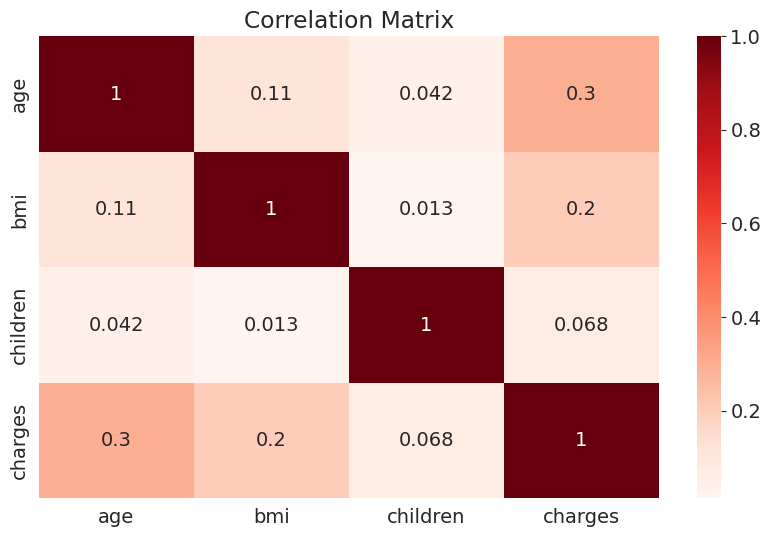

In [ ]:
sns.heatmap(medical_df.select_dtypes(include='number').corr(),cmap='Reds', annot=True)
plt.title('Correlation Matrix')


# **Linear regression**

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

Text(0.5, 1.0, 'Age vs. Charges')

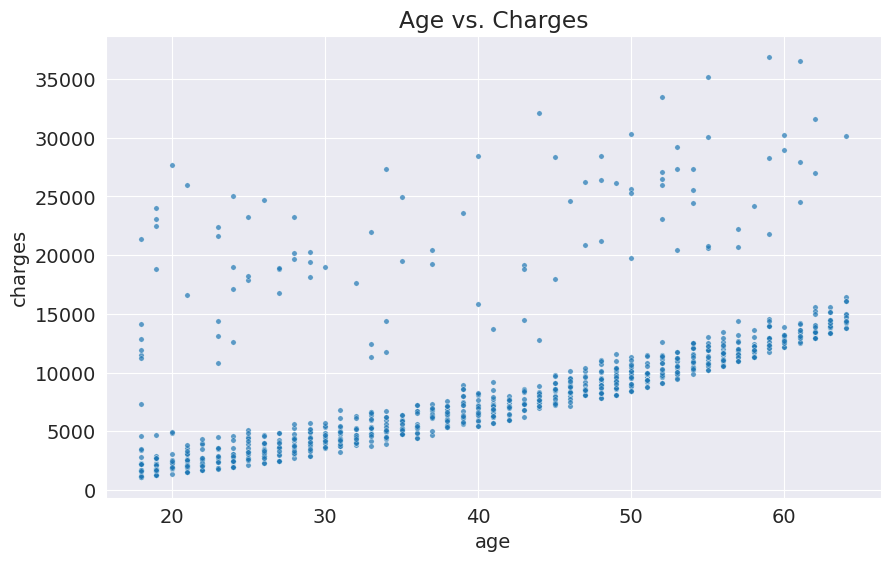

In [ ]:
sns.scatterplot(data=non_smoker_df, x='age', y='charges',alpha=0.7,s=15)
plt.title('Age vs. Charges')

## **Manullay fitting regression line**

 $y = wx + b$

 Paremeters

$w$ = slope. which is also called as *weight* in machine learning

$b$ = Intercept. Also called *bias*

In [ ]:
def estimate_charges(age, w, b):
  return w * age + b

In [ ]:
w = 50
b = 100

In [ ]:
estimate_charges(40, w, b)

2100

In [ ]:
ages = non_smoker_df.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:

estimated_charges = estimate_charges(ages, w, b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [ ]:
non_smoker_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


Text(0, 0.5, 'Estimated Charges')

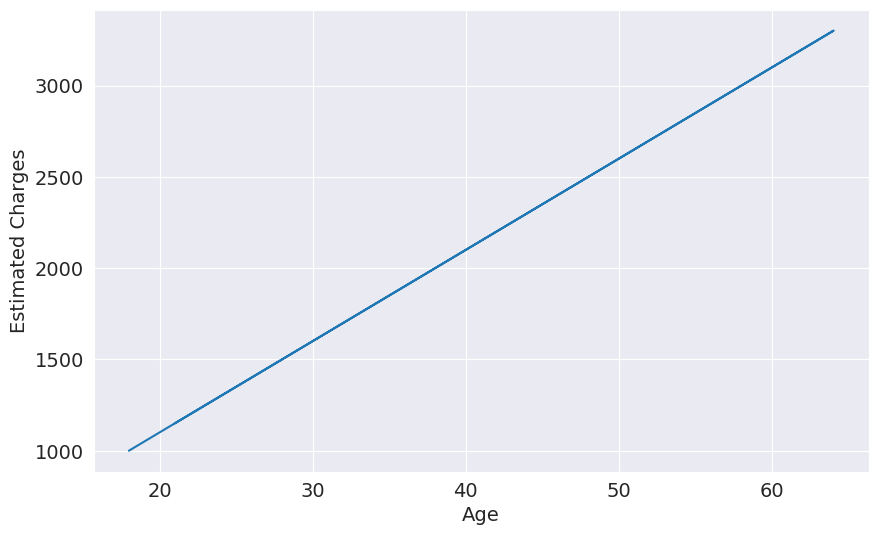

In [ ]:
plt.plot(ages, estimated_charges)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

**How good our model is?**

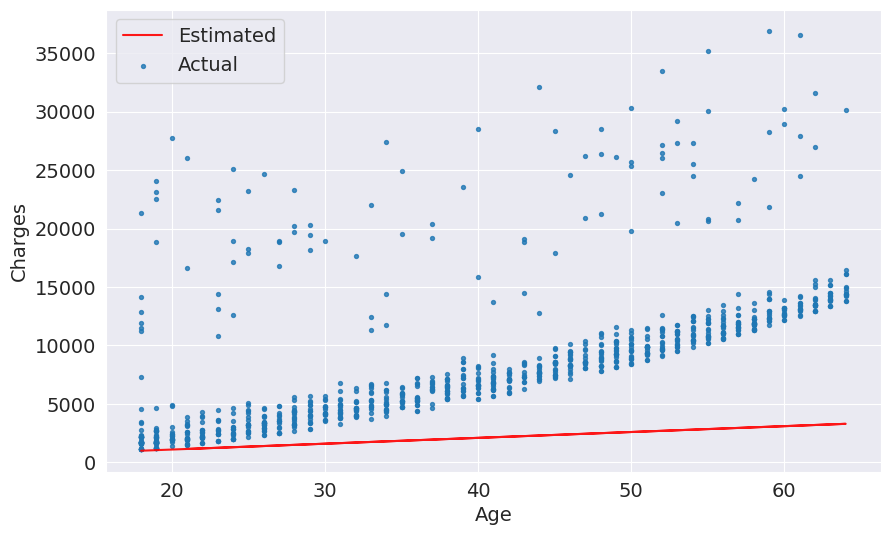

In [ ]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges,'r', alpha=0.9)
plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimated', 'Actual'])

Very bad model...........

So, let's see what happens if we changes the values of $w$ and $b$

In [ ]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  estimated_charges = estimate_charges(ages, w, b)
  plt.plot(ages, estimated_charges,'r', alpha=0.9)
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimated', 'Actual'])

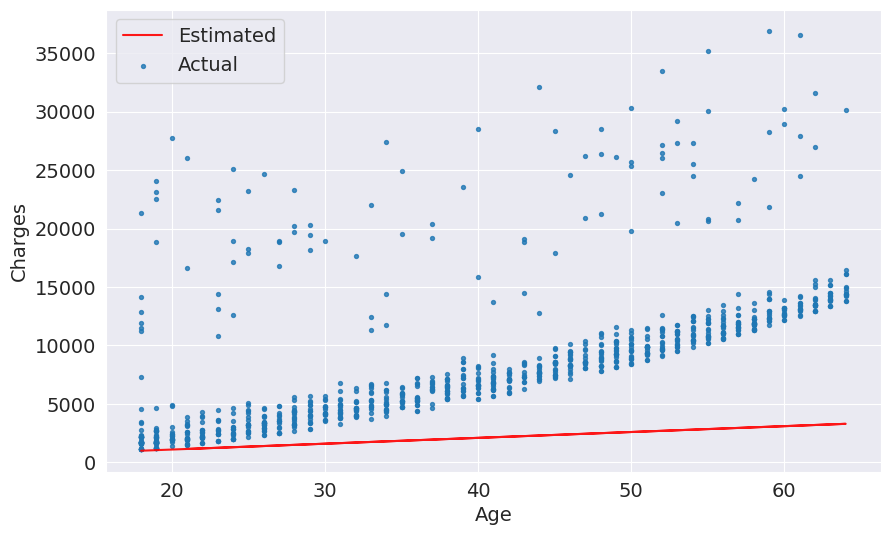

In [ ]:
try_parameters(50, 100)

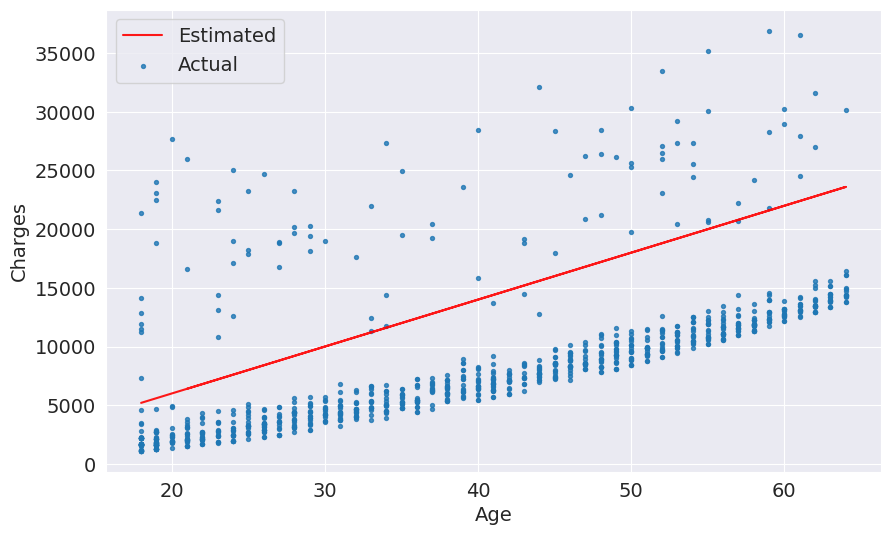

In [ ]:
try_parameters(400, -2000)

## **Fitting regression line using automation (machine learning)**

**How to approach a machine learning problem?**

1.   Explore the data and find correlations between inputs and targets.
2.   Pick the right model, loss fuctions and optimizer
3.   Scale numeric variables and one-hot encode categorical data
4.   Split the data set into training and test set
5.   Train the model
6.   Make predictions on the test set and compute the loss



To find a best fitted line, we have to solve two questions

1.   Find a way to measure numerically how well the line fits the points: **Root-Mean-Squared-Error (RMSE)**,**Root-Mean-Absoulte-Error**
2.   Then, find a way to modify $w$ and $b$: **Ordinary-Least-Squares, Stochastic-Gradient-Descent**



**Root-Mean-Squared-Error (RMSE)**

In [ ]:
import numpy as np

In [ ]:
targets = non_smoker_df.charges
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
predictions = estimated_charges
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [ ]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
w = 50
b = 100

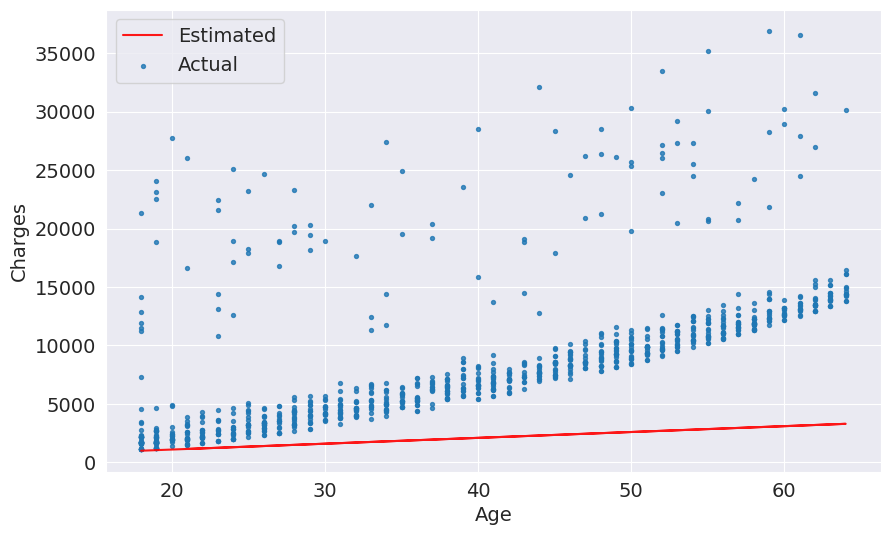

In [ ]:
try_parameters(w, b)

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)
rmse(targets, predicted)

np.float64(8461.949562575493)

In [ ]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  predictions = estimate_charges(ages, w, b)

  plt.plot(ages, predictions,'r', alpha=0.9)
  plt.scatter(ages, target, s=8, alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Prediction', 'Actual'])

  loss = rmse(target, predictions)
  print(f'RMSE Loss: {loss}')

RMSE Loss: 8461.949562575493


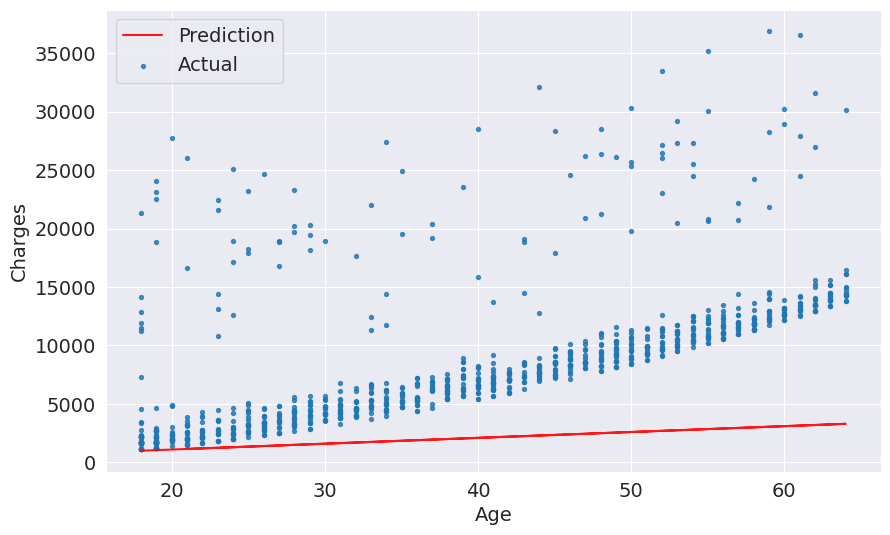

In [ ]:
try_parameters(50,100)

RMSE Loss: 4991.993804156943


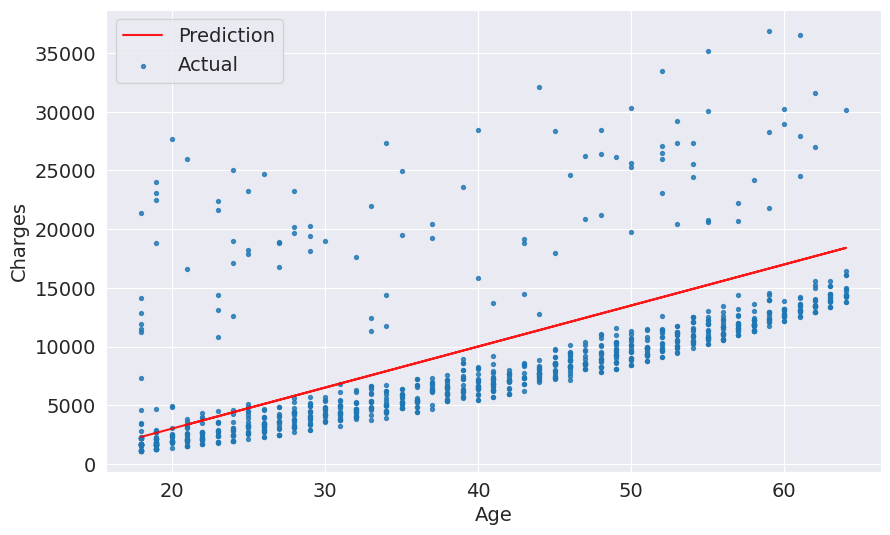

In [ ]:
try_parameters(350, -4000)

**Linear regression using Scikit-learn: Ordinary-Least-Squares**

In [ ]:
!pip install scikit-learn --quiet

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
#help(model.fit)

In [ ]:
inputs = non_smoker_df[['age']]
target = non_smoker_df.charges
print('inputs.shape:',inputs.shape)
print('target.shape:',target.shape)

inputs.shape: (1064, 1)
target.shape: (1064,)


In [ ]:
model.fit(inputs, target)

LinearRegression()

In [ ]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
rmse(target, predictions)

np.float64(4662.505766636395)

In [ ]:
model.coef_ # This is w

array([267.24891283])

In [ ]:
model.intercept_# This is b

np.float64(-2091.4205565650864)

RMSE Loss: 4662.505766636395


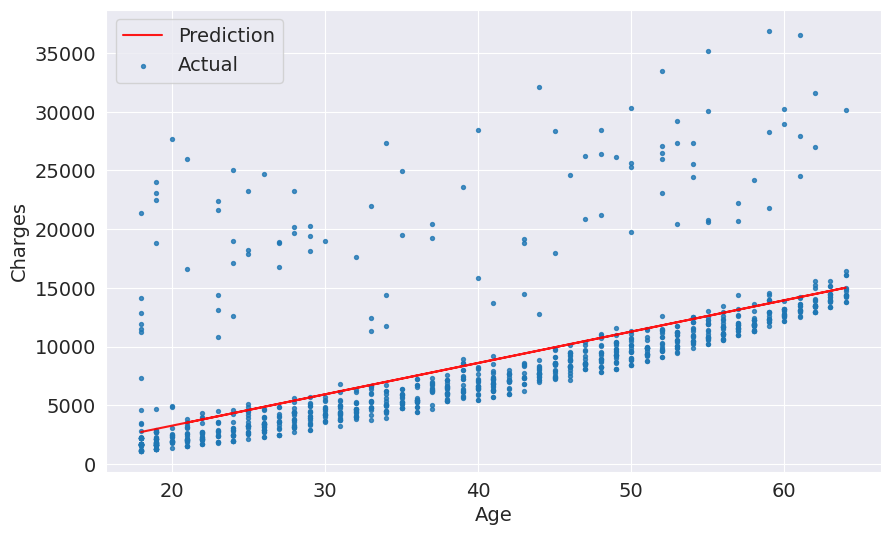

In [ ]:
try_parameters(model.coef_, model.intercept_)

**Linear regression using Scikit-learn: Stochastic gradient descent**

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
model = SGDRegressor()

In [ ]:
model.fit(inputs, target)

SGDRegressor()

In [ ]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 5703.73950459, 12927.14163702, 25310.11672118])

In [ ]:
predictions = model.predict(inputs)
predictions

array([ 3123.95302872,  8283.52598045, 10863.31245632, ...,
        3123.95302872,  3123.95302872,  4671.82491424])

In [ ]:
rmse(target, predictions)

np.float64(8170.418448668034)

In [ ]:
model.coef_ # This is w

array([515.95729517])

In [ ]:
model.intercept_# This is b

array([-6163.2782844])

RMSE Loss: 8170.418448668034


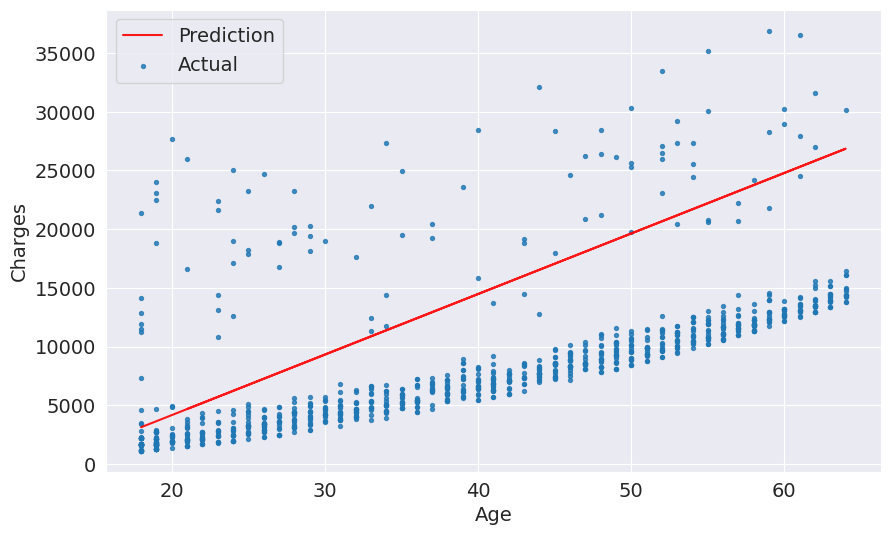

In [ ]:
try_parameters(model.coef_, model.intercept_)

**Summary**

**OLS**

In [ ]:
# Inputs: Create inputs and target
inputs, targets = non_smoker_df[['age']], non_smoker_df ['charges']

# Model: Build and train the model
model = LinearRegression().fit(inputs,targets)

# Outputs: Generate predictions
predictions = model.predict(inputs)

# Calculate the loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')



RMSE Loss: 4662.505766636395


**SGD**

In [ ]:
# Inputs: Create inputs and target
inputs, targets = non_smoker_df[['age']], non_smoker_df ['charges']

# Model: Build and train the model
model = SGDRegressor().fit(inputs,targets)

# Outputs: Generate predictions
predictions = model.predict(inputs)

# Calculate the loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 5863.18662587459


# **Multiple linear regression**

In [ ]:
# Inputs: Create inputs and target
inputs, targets = non_smoker_df[['age','bmi']], non_smoker_df ['charges']

# Model: Build and train the model
model = LinearRegression().fit(inputs,targets)

# Outputs: Generate predictions
predictions = model.predict(inputs)

# Calculate the loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 4662.3128354612945


So, adding `bmi` in the model does not improve the prediction.

**But Why?**

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

**Because, `bmi` is very weakly correlated to `charges`**

In [ ]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 opacity=0.8,
                 hover_data=['sex'],
                 title="BMI vs Chrages")
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
fig = px.scatter_3d(medical_df,
                 x='age',
                 y='bmi',
                 z = 'charges')
fig.update_traces(marker_size=3)
fig.show()

In [ ]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

In [ ]:
# Inputs: Create inputs and target
inputs, targets = non_smoker_df[['age','bmi','children']], non_smoker_df ['charges']

# Model: Build and train the model
model = LinearRegression().fit(inputs,targets)

# Outputs: Generate predictions
predictions = model.predict(inputs)

# Calculate the loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 4608.470405038247


In [ ]:
# Inputs: Create inputs and target
inputs, targets = non_smoker_df[['age','children']], non_smoker_df ['charges']

# Model: Build and train the model
model = LinearRegression().fit(inputs,targets)

# Outputs: Generate predictions
predictions = model.predict(inputs)

# Calculate the loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 4608.579056261982


For full data set

In [ ]:
# Inputs: Create inputs and target
inputs, targets = medical_df[['age','bmi','children']], medical_df ['charges']

# Model: Build and train the model
model = LinearRegression().fit(inputs,targets)

# Outputs: Generate predictions
predictions = model.predict(inputs)

# Calculate the loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 11355.317901125973


**Including categorical variables .............**

<Axes: xlabel='smoker', ylabel='charges'>

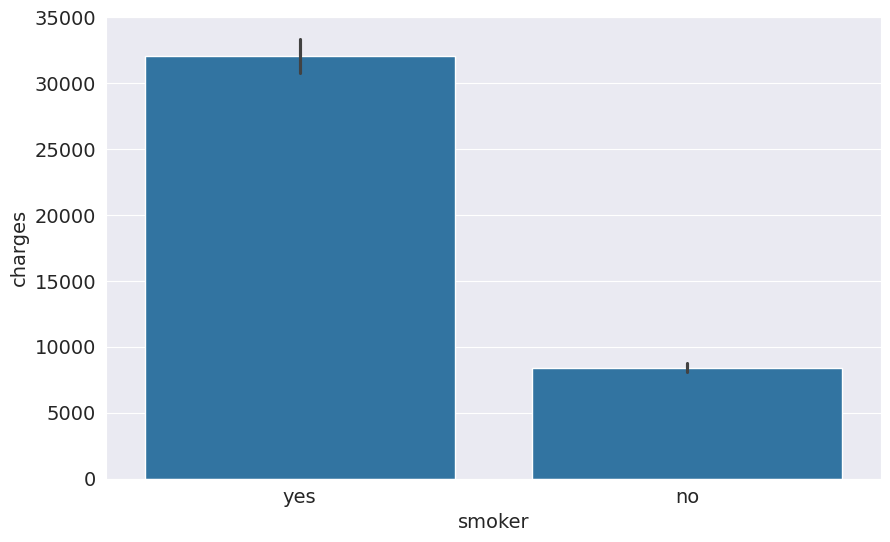

In [ ]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [ ]:
smoker_codes = {'yes': 1, 'no': 0}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:
# Inputs: Create inputs and target
inputs, targets = medical_df[['age','bmi','children','smoker_code']], medical_df ['charges']

# Model: Build and train the model
model = LinearRegression().fit(inputs,targets)

# Outputs: Generate predictions
predictions = model.predict(inputs)

# Calculate the loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 6056.439217188081


In [ ]:
sex_codes = {'male': 1, 'female': 0}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025484)

In [ ]:
# Inputs: Create inputs and target
inputs, targets = medical_df[['age','bmi','children','smoker_code','sex_code']], medical_df ['charges']

# Model: Build and train the model
model = LinearRegression().fit(inputs,targets)

# Outputs: Generate predictions
predictions = model.predict(inputs)

# Calculate the loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

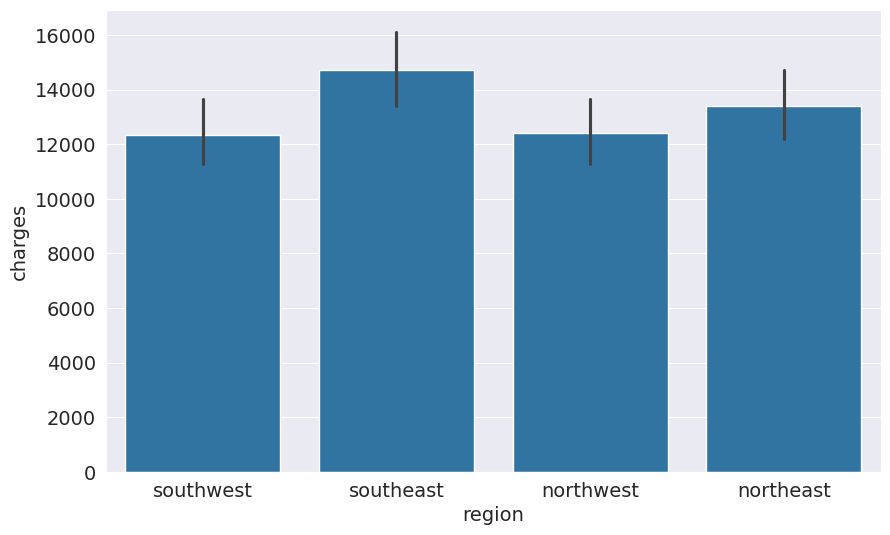

In [ ]:
sns.barplot(data=medical_df, x='region', y='charges')

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
# Inputs: Create inputs and target
inputs, targets = medical_df[['age','bmi','children','smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']], medical_df ['charges']

# Model: Build and train the model
model = LinearRegression().fit(inputs,targets)

# Outputs: Generate predictions
predictions = model.predict(inputs)

# Calculate the loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 6041.6796511744515


In [ ]:
model.coef_,model.intercept_

(array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
         -373.04175627]),
 np.float64(-12525.547811195444))

In [ ]:
input_cols = ['age','bmi','children','smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']
medical_df[input_cols].loc[10]

,10
age,25.00
bmi,26.22
children,0.00
smoker_code,0.00
sex_code,1.00
northeast,1.00
northwest,0.00
southeast,0.00
southwest,0.00


In [ ]:
model.predict([[28,30,2,1,0,0,1,0,0]])

array([29875.81463599])

One important fact is that the input data for numerical variable, like age, is large, but for categorical variable it is either 0 or 1. So, this difference has an effect of predictions made by the model.

To minimize this effect we can scale the numeric varable so that they remain within a range like -1 to 1 but centered by 0 with a normal distribution.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numerical_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numerical_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inputs = scaler.transform(medical_df[numerical_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ['smoker_code','sex_code','northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [ ]:
inputs[0]

array([-1.43876426, -0.45332   , -0.90861367,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

In [ ]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

model = LinearRegression().fit(inputs,targets)

# Outputs: Generate predictions
predictions = model.predict(inputs)

# Calculate the loss to evaluate the model
loss = rmse(targets, predictions)
print(f'RMSE Loss: {loss}')

RMSE Loss: 6041.6796511744515


In [ ]:
model.coef_, model.intercept_

(array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
         -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
         -373.04175627]),
 np.float64(8466.48321541183))

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numerical_cols + cat_cols,1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [ ]:
new_customers = [[28,30,2,1,0,0,1,0,0]]

In [ ]:
scaler.transform([[28,30,2]])

array([[-0.79795355, -0.10882659,  0.75107928]])

In [ ]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,1,0,0]])

array([29875.81463371])

**In case of machine learning, we can build our model for 90% of our data and test the model on rest 10% of the data.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [ ]:
# Model
model = LinearRegression().fit(inputs_train,targets_train)

# Outputs: Generate predictions
predictions = model.predict(inputs_test)

# Calculate the loss to evaluate the model
loss = rmse(targets_test, predictions)
print(f'Test Loss: {loss}')

Test Loss: 6474.415732218106


Compare the loss with training data .........

In [ ]:
# Outputs: Generate predictions
predictions_train = model.predict(inputs_train)

# Calculate the loss to evaluate the model
loss = rmse(targets_train, predictions_train)
print(f'Training Loss: {loss}')

Training Loss: 5994.115412333544
